# **About Covid-19**
* As we all know our country is still facing SARS-CoV-2 (n-coronavirus),the scenes of suffering in our country are hard to comprehend .As of 12 June 2021, India has the second-highest number of confirmed cases in the world (after the United States) with 29.3 million reported cases of COVID-19 infection and the third-highest number of COVID-19 deaths (after the United States and Brazil) at 367,081 deaths.A second wave beginning in March 2021 was much larger than the first, with shortages of vaccines, hospital beds, oxygen cylinders and other medicines in parts of the country. By late April, India led the world in new and active cases. On 30 April 2021, it became the first country to report over 400,000 new cases in a 24-hour period.Health experts believe that India's figures have been underreported due to several factors.¶ This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the india

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import seaborn as sns

In [ ]:
# importing dataset

state_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/covid19 csv/StatewiseTestingDetails.csv")

country_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/covid19 csv/covid_19_india.csv")

In [ ]:
country_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
country_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083
15805,15806,2021-06-08,8:00 AM,West Bengal,-,-,1388771,16362,1432019


In [ ]:
country_df.shape

(15806, 9)

In [ ]:
country_df.isnull().sum()         ## no null values are present

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

*  **Deleting sno , ConfirmedIndianNational,ConfirmedForeignNational**

In [ ]:
country_df=country_df.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [ ]:
country_df

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
15801,2021-06-08,8:00 AM,Telangana,564303,3394,593103
15802,2021-06-08,8:00 AM,Tripura,49579,572,56169
15803,2021-06-08,8:00 AM,Uttarakhand,313566,6731,334419
15804,2021-06-08,8:00 AM,Uttar Pradesh,1662069,21333,1699083


*  **new column 'Active' adding**
*  calculating active cases in our country

In [ ]:
country_df['Active']=country_df['Confirmed']-country_df['Cured']-country_df['Deaths']

In [ ]:
country_df['Active'].max()

701614

In [ ]:
#convert to date and time format

In [ ]:
country_df['Date']=pd.to_datetime(country_df['Date'])

In [ ]:
country_df.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-02-01,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-02-03,6:00 PM,Kerala,0,0,3,3


# **EDA and Visualization**

## **1. Active cases in top 6 states during the period of time**

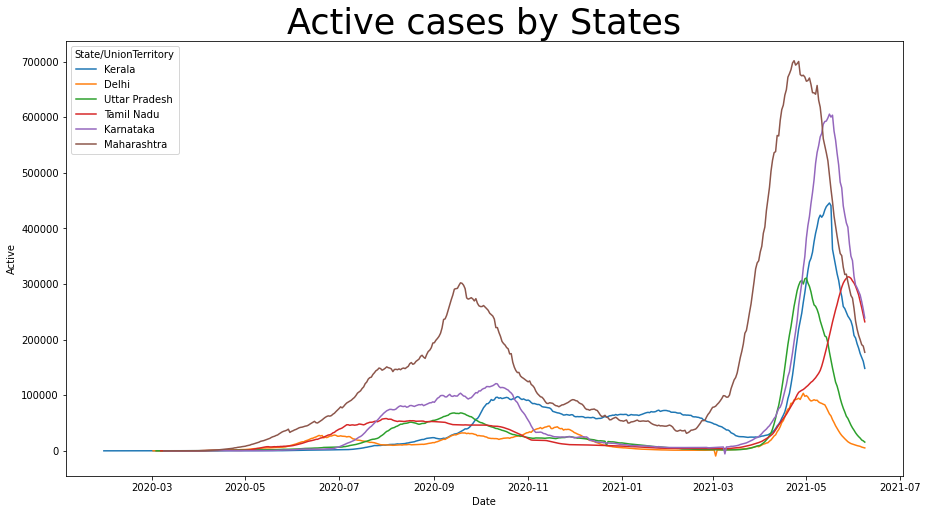

In [ ]:
# top active cases states visualization

fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=country_df[country_df['State/UnionTerritory'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra','Uttar Pradesh','Karnataka'])],
                x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases by States", size=35)
plt.show()

* **Maharashtra, Karnataka has highest number of active cases.**

In [ ]:
#making india_cases data frame
india_cases=country_df[country_df['Date']==country_df['Date'].max()].copy().fillna(0)

In [ ]:
india_cases.index=india_cases['State/UnionTerritory']

In [ ]:
#droping columns
india_cases=india_cases.drop(['State/UnionTerritory','Date'],axis=1)

In [ ]:
#india_cases df
india_cases

,Time,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,8:00 AM,6912,123,7131,96
Andhra Pradesh,8:00 AM,1637149,11552,1763211,114510
Arunachal Pradesh,8:00 AM,26131,125,29696,3440
Assam,8:00 AM,385032,3695,438746,50019
Bihar,8:00 AM,700224,5424,713879,8231
Chandigarh,8:00 AM,59193,774,60707,740
Chhattisgarh,8:00 AM,947527,13243,981860,21090
Dadra and Nagar Haveli and Daman and Diu,8:00 AM,10261,4,10419,154
Delhi,8:00 AM,1399640,24627,1429475,5208


## **2. Top 10 States with highest number of death**

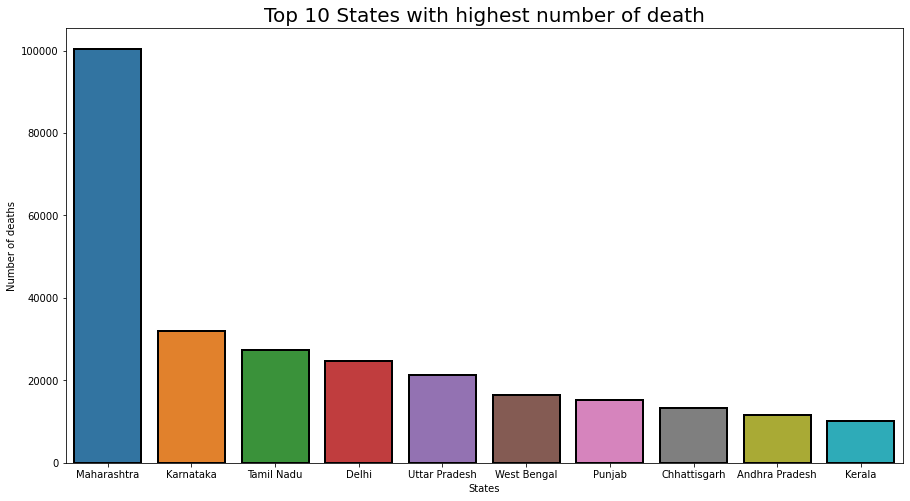

In [ ]:
#top 10 death states
top_10_death_states=india_cases.sort_values('Deaths',ascending=False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of death", size=20)
plt.xlabel("states")
plt.ylabel("Number of deaths in thousands")
ax=sns.barplot(data=top_10_death_states.iloc[:10],y=top_10_death_states.Deaths,x=top_10_death_states.index,linewidth=2,edgecolor='black').set(xlabel='States', ylabel='Number of deaths')
plt.show()

* **Maharashtra faced maximum deaths** during this period.

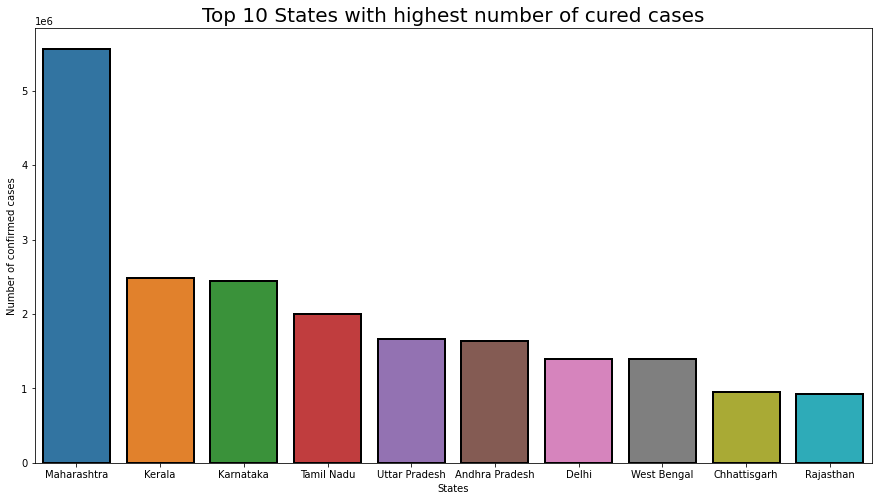

In [ ]:
# top 10 cured states
top_10_cured_states=india_cases.sort_values('Cured',ascending=False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cured cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of cured cases")
ax=sns.barplot(data=top_10_cured_states.iloc[:10],y=top_10_cured_states.Cured,x=top_10_cured_states.index,linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

* **Maharashtra have maximum number of cured cases.**

## **3. Vaccination**

In [ ]:
# importing vaccination data
vaccination = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/covid19 csv/covid_vaccine_statewise.csv')

In [ ]:
vaccination.head(20)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


In [ ]:
vaccination.shape

(5328, 18)

In [ ]:
#checking null values
vaccination.isnull().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated             40
Total Sessions Conducted                 40
Total Sites                              40
First Dose Administered                  40
Second Dose Administered                 40
Male(Individuals Vaccinated)             40
Female(Individuals Vaccinated)           40
Transgender(Individuals Vaccinated)      40
Total Covaxin Administered               40
Total CoviShield Administered            40
Total Sputnik V Administered           4666
AEFI                                   2221
18-45 years (Age)                      2226
45-60 years (Age)                      2225
60+ years (Age)                        2225
Total Doses Administered                 37
dtype: int64

In [ ]:
# removing columns having most null values

In [ ]:
vaccination = vaccination.drop(
    ['Total Sputnik V Administered','AEFI', '18-45 years (Age)','45-60 years (Age)','60+ years (Age)'], axis=1)

In [ ]:
vaccination.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


## **4. Male and Female Vaccinated ratio for Covid19**

In [ ]:
#male, fenale, trans vaccinated using pie chart

male=vaccination['Male(Individuals Vaccinated)'].sum()
female=vaccination['Female(Individuals Vaccinated)'].sum()
trans=vaccination['Transgender(Individuals Vaccinated)'].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

* **Male vaccinated- 52.7%**
* **Female vaccinated- 47.3%**

## **5. Covaxin and Covishield Vaccination**

In [ ]:
# covaxin and covishield vaccine ratio using pie chart
covaxin=vaccination['Total Covaxin Administered'].sum()
covishield=vaccination['Total CoviShield Administered'].sum()
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[covaxin,covishield],title="Covaxin and Covishield Vaccination")

* **Total covishield vaccinated- 90.1%**
* **Total covaxin vaccinated- 9.91%**

In [ ]:
# making a df v contain states

v=vaccination[vaccination.State!='India']
print(v.index)

Int64Index([ 144,  145,  146,  147,  148,  149,  150,  151,  152,  153,
            ...
            5318, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327],
           dtype='int64', length=5184)


In [ ]:
v.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Doses Administered
144,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
145,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0
146,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,42.0
147,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,89.0
148,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,124.0


In [ ]:
# renaming columns
v.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# groupby states and vaccination
states_grouped=v.groupby('State')['Total'].sum().to_frame('Total')

# top 5 vaccinated states
states_grouped=states_grouped.sort_values('Total',ascending=False).head(5)

states_grouped

,Total
State,
Maharashtra,1.036216e+09
Rajasthan,8.529093e+08
Uttar Pradesh,8.506090e+08
Gujarat,7.976807e+08
West Bengal,6.839649e+08


## **6. Top 5 Vaccinated states**

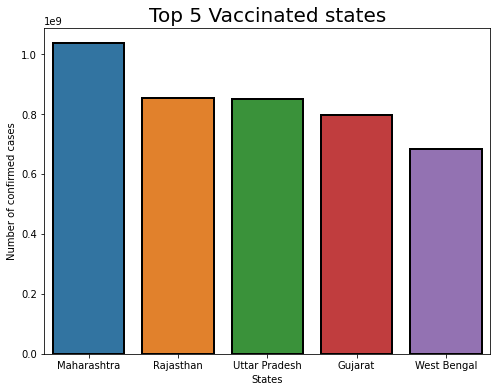

In [ ]:
# plotting bargraph of top 5 vaccinated states

fig=plt.figure(figsize=(8,6))
plt.title("Top 5 Vaccinated states", size=20)
plt.xlabel("states")
plt.ylabel("Vaccination number")
x=sns.barplot(data=states_grouped.iloc[:10],y=states_grouped.Total,x=states_grouped.index,linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of confirmed cases')
plt.show()

* **Maharashtra is Highest vaccinated state.**

## **7. Doses administered vs People Vaccinated India**

In [ ]:
# doses and vaccinated visualization using pie chart.

doses=vaccination['Total Doses Administered'].sum()
vaccinated=vaccination['Total Individuals Vaccinated'].sum()
px.pie(names=["Doses Administered","People Vaccinated"],values=[doses,vaccinated],title="Doses administered vs People Vaccinated India")

* **Around 54.9% doses administered and 45.1% people vaccinated in India.**

## **8. Doses Administered vs People Vaccinated Rajasthan**

In [ ]:
# making a df rajasthan_df for visualization

df_rajasthan=vaccination[vaccination['State']=='Rajasthan']

In [ ]:
doses_R=df_rajasthan['Total Doses Administered'].sum()
vaccinated_R=df_rajasthan['Total Individuals Vaccinated'].sum()
px.pie(names=["Doses Administered","People Vaccinated"],values=[doses_R,vaccinated_R],title="Doses administered vs People Vaccinated Rajasthan")

* **Aorund 54.4% doses administered and 45.6% people wese vaccinated in Rajasthan.**